In [1]:
import fitsio
import proplot as pplt
import numpy as np

In [2]:
dall = fitsio.read("piffqa.fits", lower=True)
dall.dtype.names

('filename',
 'expnum',
 'ccdnum',
 'star_t_mean',
 'star_t_std',
 'nstar',
 'flag',
 'fwhm_cen',
 'exp_star_t_mean',
 'exp_star_t_std')

In [9]:
d = dall[(dall["flag"] == 0) & (dall["nstar"] >= 30)]

exposure cut: 3.579319343617911e-05
star T cut: 2.277748673211398e-05
fwhm_cen cut: 0.0


Text(0.5, 1.0, 'cut: 0.000%')

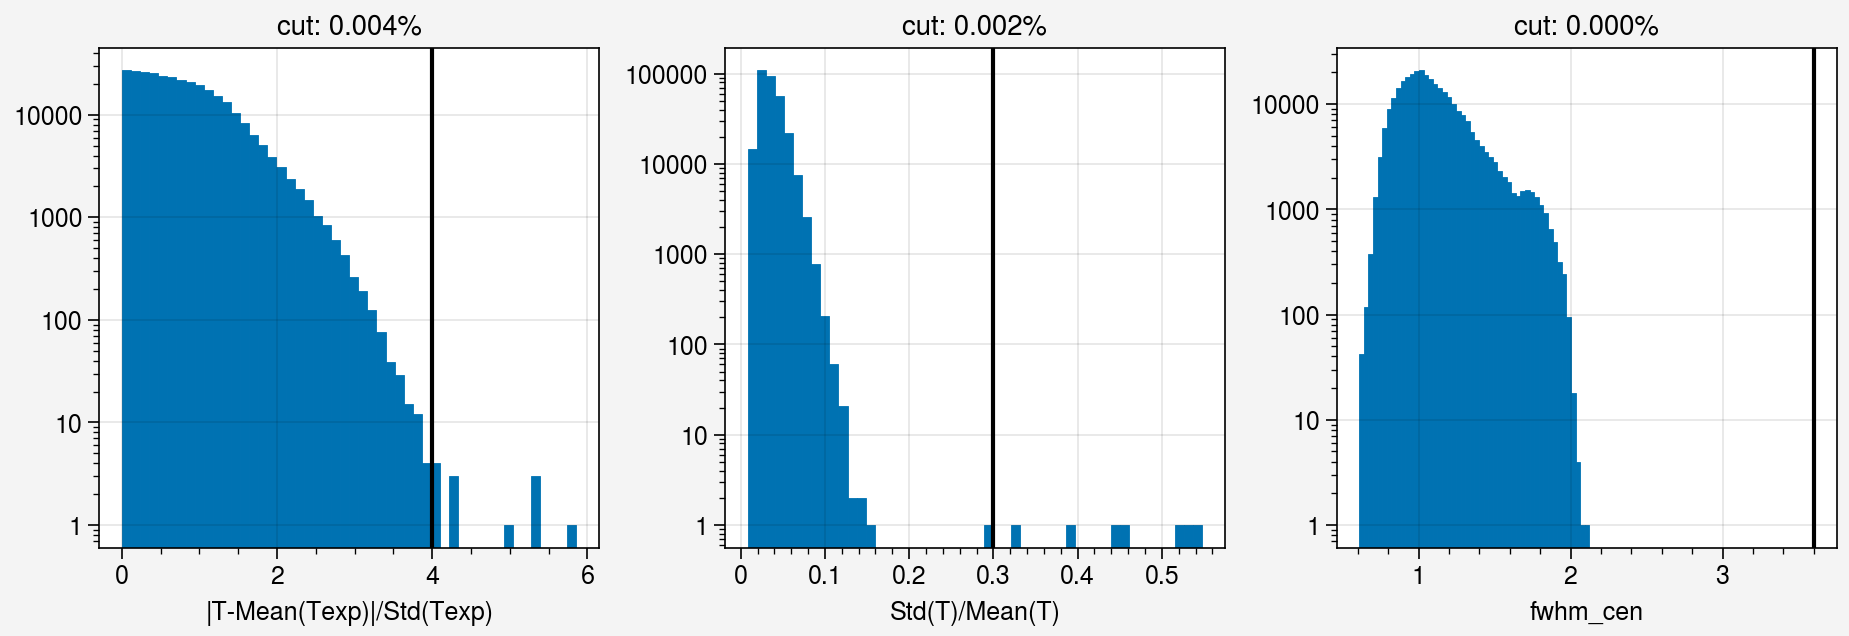

In [14]:
fig, axs = pplt.subplots(nrows=1, ncols=3, share=0)

ax = axs[0]
ax.hist(
    np.abs(d["star_t_mean"] - d["exp_star_t_mean"])/d["exp_star_t_std"],
    bins=50,
    log=True
);
ax.set_xlabel("|T-Mean(Texp)|/Std(Texp)")
ax.axvline(4, color="k")
frac = np.mean(np.abs(d["star_t_mean"] - d["exp_star_t_mean"])/d["exp_star_t_std"] > 4)
print("exposure cut:", frac)
ax.set_title("cut: %0.3f%%" % (frac*100))

ax = axs[1]
ax.hist(
    d["star_t_std"]/d["star_t_mean"],
    bins=50,
    log=True
);
frac = np.mean(d["star_t_std"]/d["star_t_mean"] >= 0.3)
print("star T cut:", frac)
ax.set_xlabel("Std(T)/Mean(T)")
ax.axvline(0.3, color="k")
ax.set_title("cut: %0.3f%%" % (frac*100))

ax = axs[2]
ax.hist(
    d["fwhm_cen"],
    bins=50,
    log=True
);
frac = np.mean(d["fwhm_cen"] > 3.6)
print("fwhm_cen cut:", frac)
ax.set_xlabel("fwhm_cen")
ax.axvline(3.6, color="k")
ax.set_title("cut: %0.3f%%" % (frac*100))
